In [1]:
from sklearn import datasets
import pandas as pd

In [3]:
iris=datasets.load_iris() #iris 데이터 가져오기

In [5]:
iris.keys() #key 확인

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [9]:
labels=pd.DataFrame(iris.target) #target(정답) 3가지 종류가 있음
labels

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [10]:
data=pd.DataFrame(iris.data) #data 값
data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [11]:
labels.columns=['labels']

In [12]:
data.columns=['Sepal length','Sepal width','Petal length','Petal width']

In [13]:
labels

,labels
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [14]:
data

,Sepal length,Sepal width,Petal length,Petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
data=pd.concat([data, labels], axis=1)
data

,Sepal length,Sepal width,Petal length,Petal width,labels
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [17]:
feature=data[['Sepal length', 'Sepal width']]
feature

,Sepal length,Sepal width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
#K-Means
model=KMeans(n_clusters=3)
#결과값이 3종류인걸 알고 있어서 n_cluster(cluster의 갯수)를 3개로 설정 / 알수 없을 때 시각화 해서 cluster 갯수 설정

In [20]:
model.fit(feature) #feature의 데이터를 가지고 모델 훈련

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3)

In [22]:
pred=pd.DataFrame(model.predict(feature)) #결과값, 훈련했던 데이터를 그대로 입력함 원칙적으로 맞지 않음
# model.predict(새로운 데이터)가 맞음
pred.columns=['predict']
pred

,predict
0,2
1,2
2,2
3,2
4,2
...,...
145,0
146,1
147,0
148,0


In [24]:
res=pd.concat([feature, pred], axis=1) #기존 데이터와 예측 결과값을 합침, 기존의 labels 열과는 다름
res

,Sepal length,Sepal width,predict
0,5.1,3.5,2
1,4.9,3.0,2
2,4.7,3.2,2
3,4.6,3.1,2
4,5.0,3.6,2
...,...,...,...
145,6.7,3.0,0
146,6.3,2.5,1
147,6.5,3.0,0
148,6.2,3.4,0


In [25]:
model.cluster_centers_ #cluster들의 중심점 좌표 1행이 첫번째 점

array([[6.81276596, 3.07446809],
       [5.77358491, 2.69245283],
       [5.006     , 3.428     ]])

In [28]:
centers=pd.DataFrame(model.cluster_centers_, columns=['Sepal length', 'Sepal width'])
centers

,Sepal length,Sepal width
0,6.812766,3.074468
1,5.773585,2.692453
2,5.006000,3.428000


In [29]:
c_x=centers['Sepal length']
c_y=centers['Sepal width']

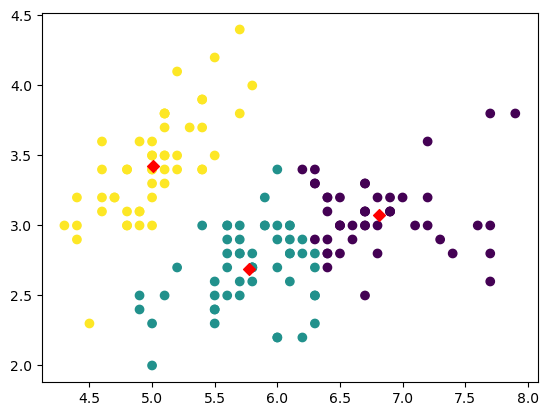

In [34]:
plt.scatter(res['Sepal length'], res['Sepal width'], c=res['predict']) # x축 Sepal length, y축 Sepal width, predict로 색 구분
plt.scatter(c_x, c_y, c='r', marker='D') #중심점

In [35]:
#크로스테이블
pd.crosstab(data['labels'], res['predict']) #data['labels']는 정답, res['predict']는 예측값
#labels 0이 predict의 2가 같은 종류, 150개중에 123개 맞춤

predict,0,1,2
labels,,,
0,0,0,50
1,12,38,0
2,35,15,0


In [36]:
print(123/150) #정확도

0.82


In [37]:
#######SNS 데이터를 바탕으로 학생 클러스터 생성##########

In [39]:
data=pd.read_csv('snsdata.csv')
data

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,NaN,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        27276 non-null  object 
 2   age           24914 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [41]:
data.describe() #기술 통계는 수치 데이터에 대해서만 나옴
#평균과 중위수 비교 -> 차이가 크면 편향된 값 있는것 예상
#표준편차 -> 데이터의 퍼짐
#최대값 최소값 -> 데이터의 범위

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,24914.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,2007.500000,17.993950,30.179467,0.267333,0.252300,0.222767,0.161200,0.143133,0.13440,0.106633,...,0.098933,0.257367,0.353000,0.14850,0.069867,0.051167,0.184100,0.114233,0.087967,0.060433
std,1.118053,7.858054,36.530877,0.804708,0.705357,0.917226,0.739707,0.639943,0.51699,0.514333,...,1.942319,0.695758,0.724391,0.47264,0.346779,0.279555,0.624516,0.436796,0.399125,0.345522
min,2006.000000,3.086000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,16.312000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.500000,17.287000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.250000,18.259000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,106.927000,830.000000,24.000000,15.000000,27.000000,17.000000,14.000000,31.00000,9.000000,...,327.000000,12.000000,11.000000,8.00000,9.000000,8.000000,22.000000,14.000000,8.000000,16.000000


In [42]:
data.describe(include='object') #object만 기술통계 unique 종류, top 종류중 많은 것, freq 많은것의 count

,gender
count,27276
unique,2
top,F
freq,22054


In [43]:
data.isnull().sum() #결측값 확인

gradyear           0
gender          2724
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [44]:
data['gender'].value_counts()

F    22054
M     5222
Name: gender, dtype: int64

In [45]:
data['gender'].value_counts(dropna=False) #결측값까지 포함해서 출력

F      22054
M       5222
NaN     2724
Name: gender, dtype: int64

In [47]:
data['gender'].fillna('not disclosed', inplace=True) #결측값을 not disclosed로 채움

In [48]:
data.isnull().sum() #gender 결측값이 없음을 확인

gradyear           0
gender             0
age             5086
friends            0
basketball         0
football           0
soccer             0
softball           0
volleyball         0
swimming           0
cheerleading       0
baseball           0
tennis             0
sports             0
cute               0
sex                0
sexy               0
hot                0
kissed             0
dance              0
band               0
marching           0
music              0
rock               0
god                0
church             0
jesus              0
bible              0
hair               0
dress              0
blonde             0
mall               0
shopping           0
clothes            0
hollister          0
abercrombie        0
die                0
death              0
drunk              0
drugs              0
dtype: int64

In [49]:
data['gender'].value_counts()

F                22054
M                 5222
not disclosed     2724
Name: gender, dtype: int64

In [51]:
data['age'].isnull().sum()

#졸업연도 별 나이의 평균을 구하시오.

5086

In [56]:
data.groupby('gradyear').get_group(2006)

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,2006,not disclosed,NaN,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,2006,not disclosed,NaN,37,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
7497,2006,F,18.513,18,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,2006,F,19.105,59,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [57]:
data.groupby('gradyear').groups

{2006: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], 2007: [7500, 7501, 7502, 7503, 7504, 7505, 7506, 7507, 7508, 7509, 7510, 7511, 7512, 7513, 7514, 7515, 7516, 7517, 7518, 7519, 7520, 7521, 7522, 7523, 7524, 7525, 7526, 7527, 7528, 7529, 7530, 7531, 7532, 7533, 7534, 7535, 7536, 7537, 7538, 7539, 7540, 7541, 7542, 7543, 7544, 7545, 7546, 7547, 7548, 7549, 7550, 7551, 7552, 7553, 7554, 7555, 7556, 7557, 7558, 7559, 7560, 7561, 7562, 7563, 7564, 7565, 7566, 7567, 7568, 7569, 7570, 7571, 7572, 7573, 7574, 7575, 7576, 7577, 7578, 7579, 7580, 7581, 7582, 7583, 7584, 7585, 7586, 7587, 7588, 7589, 7590, 7591, 7592, 7593, 7594, 7595, 7596, 7597, 7

In [58]:
data.groupby('gradyear').age.mean() #gradyear로 그룹화 해서 age의 평균값

gradyear
2006    19.137241
2007    18.391459
2008    17.523867
2009    16.876025
Name: age, dtype: float64

In [ ]:
#age열 값이 결측값이 데이터에 대해 동일한 gradyear에 대한 그룹별 age열의 평균값으로 대체

In [61]:
data.groupby('gradyear')

In [63]:
data['age']=data.groupby('gradyear')['age'].transform(lambda x:x.fillna(x.mean())) #x에 각각의 연도별 그룹의 age가 들어감

In [64]:
data

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 40 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gradyear      30000 non-null  int64  
 1   gender        30000 non-null  object 
 2   age           30000 non-null  float64
 3   friends       30000 non-null  int64  
 4   basketball    30000 non-null  int64  
 5   football      30000 non-null  int64  
 6   soccer        30000 non-null  int64  
 7   softball      30000 non-null  int64  
 8   volleyball    30000 non-null  int64  
 9   swimming      30000 non-null  int64  
 10  cheerleading  30000 non-null  int64  
 11  baseball      30000 non-null  int64  
 12  tennis        30000 non-null  int64  
 13  sports        30000 non-null  int64  
 14  cute          30000 non-null  int64  
 15  sex           30000 non-null  int64  
 16  sexy          30000 non-null  int64  
 17  hot           30000 non-null  int64  
 18  kissed        30000 non-nu

In [66]:
data[data['age']<10] #이상치

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
34,2006,F,8.383,0,0,0,0,1,0,0,...,0,1,0,0,0,0,2,0,0,0
1329,2006,F,8.772,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1572,2006,F,8.370,31,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2412,2006,F,8.441,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2565,2006,F,5.194,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3860,2006,F,6.297,25,0,0,0,0,1,0,...,1,3,0,3,0,0,2,0,0,1
4017,2006,F,8.323,18,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4084,2006,F,8.402,36,0,0,1,0,5,0,...,0,1,0,0,0,0,0,0,0,0
4719,2006,F,8.594,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6219,2006,F,8.361,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
data[data['age']>100]

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
70,2006,not disclosed,106.686,24,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
573,2006,F,106.261,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
710,2006,M,105.840,13,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
736,2006,not disclosed,106.864,28,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
796,2006,M,106.927,47,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28936,2009,M,105.971,47,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
29677,2009,F,106.801,67,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29809,2009,F,106.130,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29922,2009,F,106.864,44,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,1


<Axes: >

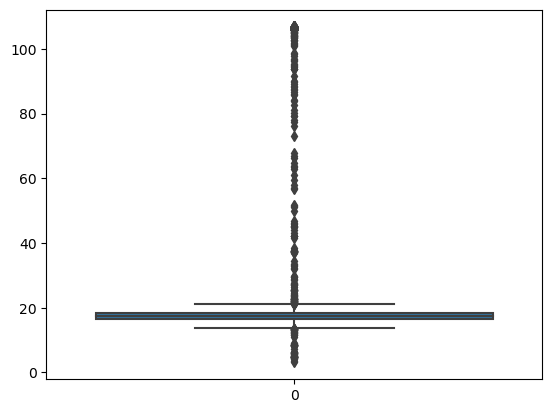

In [69]:
sns.boxplot(data['age'])

In [75]:
q1=data['age'].quantile(0.25) #오름차순에서 25프로 지점
q1

16.504

In [76]:
q3=data['age'].quantile(0.75)
q3

18.391459224069674

In [77]:
iqr=q3-q1
iqr

1.8874592240696728

In [79]:
q1-1.5*iqr #lower boundary

13.672811163895492

In [82]:
q3+1.5*iqr #upper boundary

21.222648060174183

In [86]:
df=data[(data['age']>(q1-1.5*iqr)) & (data['age']<(q3+1.5*iqr))] #age열의 값이 정상범위 값 안에 있다면
df
#아웃라이어를 제외한 정상 범위의 데이터만 추출하여 데이터프레임 구성

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
df['age'].describe()

count    29633.000000
mean        17.377469
std          1.147764
min         13.719000
25%         16.501000
50%         17.426000
75%         18.387000
max         21.158000
Name: age, dtype: float64

<Axes: >

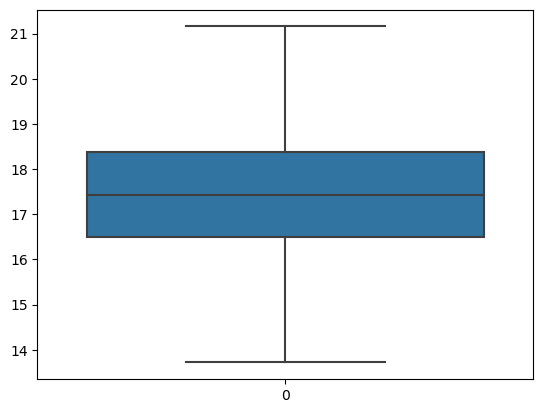

In [88]:
sns.boxplot(df['age'])

In [89]:
#표준화를 통해서 단어의 언급 수가 많은건지 적은건지 알 수 있음
# ex) basketball = 10 => 표준화 -1 평균보다 적게 언급
# ex) football = 3 => 표준화 2 평균보다 많이 언급
#표준화 한 후 평균 언급 횟수 0 => 0보다 적으면 적게 언급 0보다 많으면 많이 언급

In [90]:
df

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
names=df.columns[4:]
names

Index(['basketball', 'football', 'soccer', 'softball', 'volleyball',
       'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute',
       'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music',
       'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde',
       'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die',
       'death', 'drunk', 'drugs'],
      dtype='object')

In [134]:
scaled_feature=data.copy() #copy()를 안쓰면 scaled_feature에 변경이 생기면 data도 같이 변함

In [135]:
features=scaled_feature[names]
features

,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [136]:
features.values #데이터 프레임을 어레이로 변경

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 1, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
scaler=StandardScaler().fit(features.values) #StandardScaler에 객체 생성, fit 안에 어레이 상태로 넣어야함

In [139]:
features=scaler.transform(features.values) #표준화
features

array([[-0.33221726, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726,  1.06004883, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726,  1.06004883, -0.2428741 , ...,  2.02790809,
        -0.22040264, -0.1749076 ],
       ...,
       [-0.33221726,  1.06004883, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [-0.33221726, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ],
       [ 2.15319868, -0.35769737, -0.2428741 , ..., -0.26153016,
        -0.22040264, -0.1749076 ]])

In [140]:
features.shape

(30000, 36)

In [141]:
scaled_feature

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29996,2009,M,15.792,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29997,2009,M,15.784,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29998,2009,M,16.378,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
scaled_feature[names]=features #표준화한 값들을 scaled_feature에 넣음

In [143]:
scaled_feature

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,2006,F,18.801,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,2006,M,18.335,69,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,2006,F,18.875,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,2006,not disclosed,18.995,10,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29996,2009,M,15.792,1,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29997,2009,M,15.784,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29998,2009,M,16.378,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908


In [144]:
scaled_feature.describe() #평균값으 0에 가깝고 표준편차는 1에 가까움

,gradyear,age,friends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,...,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,2007.500000,17.982148,30.179467,5.494864e-17,-4.547474e-17,1.515825e-17,3.031649e-17,3.789561e-18,1.894781e-17,-3.789561e-17,...,-8.289665e-18,-1.136868e-17,5.873820e-17,1.515825e-17,5.494864e-17,1.136868e-17,-9.687066e-17,-1.610564e-17,-1.515825e-17,1.752672e-17
std,1.118053,7.169862,36.530877,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,2006.000000,3.086000,0.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
25%,2006.750000,16.504000,3.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
50%,2007.500000,17.443000,20.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
75%,2008.250000,18.391459,44.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,-2.073271e-01,...,-5.093652e-02,-3.699147e-01,8.931794e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
max,2009.000000,106.927000,830.000000,2.949277e+01,2.090850e+01,2.919421e+01,2.276453e+01,2.165366e+01,5.970348e+01,1.729137e+01,...,1.683073e+02,1.687776e+01,1.469812e+01,1.661229e+01,2.575205e+01,2.843431e+01,3.493308e+01,3.179061e+01,1.982379e+01,4.613268e+01


In [145]:
scaled_feature

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,M,18.982,7,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,2006,F,18.801,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,2006,M,18.335,69,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,2006,F,18.875,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,2006,not disclosed,18.995,10,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,M,16.115,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29996,2009,M,15.792,1,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29997,2009,M,15.784,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29998,2009,M,16.378,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908


In [146]:
#M이면 1, F면 2, not disclosed면 3으로 바꾸는 함수
def gen_to_num(x):
    if x=='M':
        return 1
    if x=='F':
        return 2
    if x=='not disclosed':
        return 3

In [147]:
scaled_feature['gender']=scaled_feature['gender'].apply(gen_to_num) #gen_to_num 함수 적용
scaled_feature['gender']

0        1
1        2
2        1
3        2
4        3
        ..
29995    1
29996    1
29997    1
29998    1
29999    2
Name: gender, Length: 30000, dtype: int64

In [150]:
scaled_feature

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2006,1,18.982,7,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
1,2006,2,18.801,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,1.067392,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
2,2006,1,18.335,69,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,2.027908,-0.220403,-0.174908
3,2006,2,18.875,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
4,2006,3,18.995,10,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,2.273673,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,2.285122,2.719316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2009,1,16.115,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29996,2009,1,15.792,1,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29997,2009,1,15.784,0,-0.332217,1.060049,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908
29998,2009,1,16.378,0,-0.332217,-0.357697,-0.242874,-0.217928,-0.22367,-0.259971,...,-0.050937,-0.369915,-0.487314,-0.314198,-0.201476,-0.183032,-0.294793,-0.261530,-0.220403,-0.174908


In [151]:
scaled_feature.describe()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,...,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,2007.500000,1.916733,17.982148,30.179467,5.494864e-17,-4.547474e-17,1.515825e-17,3.031649e-17,3.789561e-18,1.894781e-17,...,-8.289665e-18,-1.136868e-17,5.873820e-17,1.515825e-17,5.494864e-17,1.136868e-17,-9.687066e-17,-1.610564e-17,-1.515825e-17,1.752672e-17
std,1.118053,0.507880,7.169862,36.530877,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,...,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,2006.000000,1.000000,3.086000,0.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
25%,2006.750000,2.000000,16.504000,3.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
50%,2007.500000,2.000000,17.443000,20.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,...,-5.093652e-02,-3.699147e-01,-4.873142e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
75%,2008.250000,2.000000,18.391459,44.000000,-3.322173e-01,-3.576974e-01,-2.428741e-01,-2.179278e-01,-2.236696e-01,-2.599706e-01,...,-5.093652e-02,-3.699147e-01,8.931794e-01,-3.141979e-01,-2.014763e-01,-1.830317e-01,-2.947932e-01,-2.615302e-01,-2.204026e-01,-1.749076e-01
max,2009.000000,3.000000,106.927000,830.000000,2.949277e+01,2.090850e+01,2.919421e+01,2.276453e+01,2.165366e+01,5.970348e+01,...,1.683073e+02,1.687776e+01,1.469812e+01,1.661229e+01,2.575205e+01,2.843431e+01,3.493308e+01,3.179061e+01,1.982379e+01,4.613268e+01


In [152]:
kmeans=KMeans(n_clusters=5, random_state=42) #매번 다른 점 선택하면 분별력 없는 모델이므로 random_state 해주는게 좋음

In [153]:
model=kmeans.fit(scaled_feature) #클러스터링 K-Means 모델 만듬

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [154]:
model.labels_ #각각 몇번의 클러스터에 속하는지 표시

array([0, 0, 1, ..., 0, 0, 0])

In [155]:
model.cluster_centers_ #각 클러스터의 중심점의 좌표

array([[ 2.00743788e+03,  1.91033673e+00,  1.80783944e+01,
         6.14571913e+00, -5.25998612e-02, -3.12937775e-02,
        -3.19932940e-02, -5.40118741e-02, -5.08218551e-02,
        -3.56649254e-02, -3.89582024e-02, -2.52662335e-02,
        -1.21558612e-02, -2.74078123e-02, -6.03110292e-02,
        -2.08207550e-03, -2.23308047e-02, -3.80015075e-02,
        -1.63276611e-02, -4.86250133e-02, -2.34525607e-02,
        -1.70832472e-02, -4.15590927e-02, -2.95176052e-02,
        -3.77616327e-02, -5.24165207e-02, -2.97633681e-02,
        -9.53848037e-03, -2.51064527e-02, -3.47686188e-02,
        -9.64447646e-03, -5.22328961e-02, -7.52561799e-02,
        -2.86656171e-02, -4.24611416e-02, -3.97022654e-02,
        -8.37503068e-03, -3.02556646e-02, -9.97389730e-03,
         1.03725933e-02],
       [ 2.00762347e+03,  1.95241395e+00,  1.78884190e+01,
         7.04668515e+01,  7.94351337e-02,  4.70922626e-02,
         5.30506436e-02,  1.01858593e-01,  5.71699049e-02,
         3.98489135e-02,  6.61

In [156]:
data['cluster']=model.labels_

In [157]:
data.head()

,gradyear,gender,age,friends,basketball,football,soccer,softball,volleyball,swimming,...,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs,cluster
0,2006,M,18.982,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2006,F,18.801,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,2006,M,18.335,69,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2006,F,18.875,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006,not disclosed,18.995,10,0,0,0,0,0,0,...,0,2,0,0,0,0,0,1,1,0


In [160]:
data.groupby(['cluster']).groups

{0: [0, 1, 3, 4, 7, 10, 13, 14, 15, 21, 22, 24, 26, 27, 28, 29, 30, 34, 38, 39, 41, 46, 47, 48, 52, 53, 55, 57, 58, 59, 60, 62, 64, 65, 66, 68, 69, 73, 74, 75, 76, 77, 79, 80, 81, 83, 85, 86, 90, 93, 96, 97, 99, 100, 101, 102, 105, 106, 110, 111, 112, 116, 117, 118, 119, 122, 126, 127, 128, 129, 130, 131, 134, 136, 138, 139, 142, 143, 148, 149, 151, 152, 154, 155, 156, 157, 159, 162, 163, 164, 165, 167, 168, 171, 173, 174, 175, 176, 178, 179, ...], 1: [2, 6, 12, 23, 31, 40, 63, 72, 82, 84, 88, 89, 95, 120, 124, 125, 132, 137, 141, 146, 147, 153, 160, 177, 181, 182, 183, 184, 191, 208, 214, 216, 240, 244, 275, 283, 296, 308, 316, 328, 339, 340, 353, 356, 359, 374, 379, 389, 394, 407, 408, 413, 414, 421, 423, 428, 434, 447, 458, 461, 471, 476, 482, 496, 512, 521, 538, 540, 563, 565, 566, 568, 579, 583, 596, 601, 607, 610, 625, 643, 645, 660, 664, 683, 688, 701, 704, 708, 722, 734, 738, 741, 750, 755, 768, 778, 792, 811, 817, 823, ...], 2: [5, 16, 19, 104, 205, 215, 301, 373, 436, 486, 49

In [162]:
data.groupby(['cluster']).count()['age'] #각 클러스터에 몇건의 데이터가 포함되어 있는지 알 수 있음

cluster
0    15324
1     4329
2     1239
3     8955
4      153
Name: age, dtype: int64

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

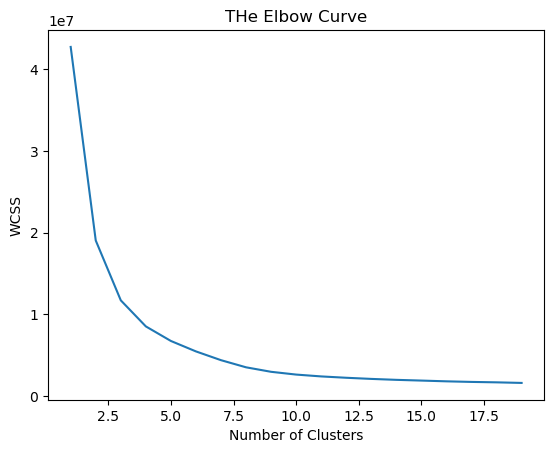

In [163]:
#elbow 그래프
wcss = [] #within cluster sum of square 
for i in range(1,20):
    kmeans = KMeans(n_clusters=i,init='k-means++' ,max_iter=300,random_state=0) #중심점 좌표의 변화가 없어야 멈추는데 300번 이상이면 그냥 멈추게
    kmeans.fit(scaled_feature)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20),wcss) 
plt.title('THe Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel("WCSS")
plt.show()

In [ ]:
#k 선택할 때 elbow의 값을 적절히 선택(급격하게 떨어지다가 완만해지는 부분) 여기서는 5~7정도가 적당해 보임 

In [183]:
kmeans = KMeans(n_clusters=9, random_state=41)
kmeans.fit(scaled_feature)

C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=9, random_state=41)

In [184]:
kmeans.labels_

array([6, 6, 0, ..., 6, 6, 6])

In [185]:
data['cluster'] = kmeans.labels_

In [186]:
import numpy as np

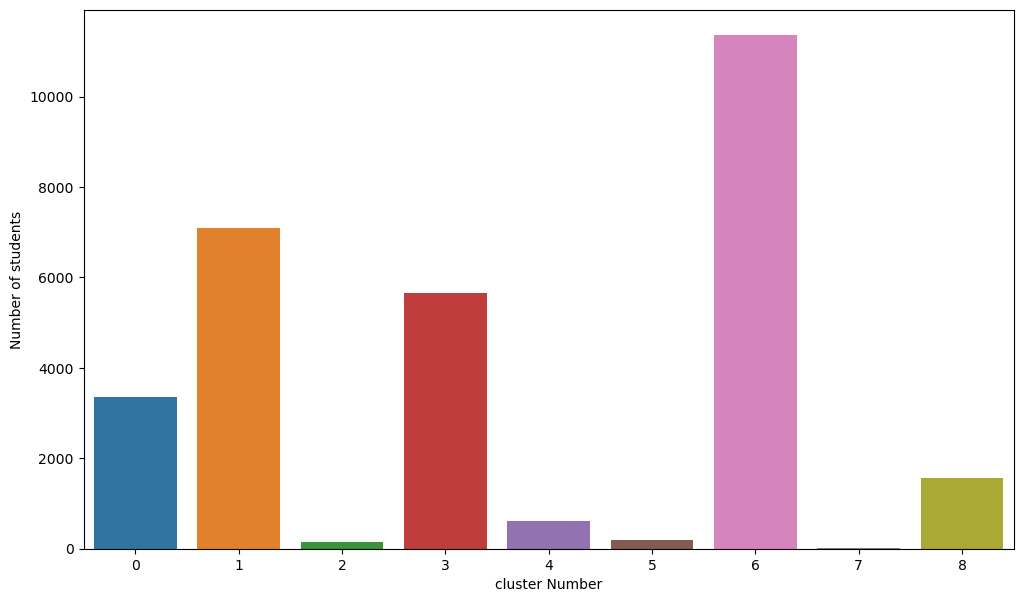

In [187]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,9,1), y=data.groupby(['cluster']).count()['age'].values)
x=axis.set_xlabel("cluster Number")
x=axis.set_ylabel("Number of students")

In [188]:
data.groupby(['cluster']).mean()[['basketball', 'football','soccer', 'softball','volleyball','swimming','cheerleading','baseball','tennis','sports','cute','sex','sexy','hot','kissed','dance','band','marching','music','rock','god','church','jesus','bible','hair','dress','blonde','mall','shopping','clothes','hollister','abercrombie','die', 'death','drunk','drugs']]

C:\Users\user\AppData\Local\Temp\ipykernel_11076\375450235.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data.groupby(['cluster']).mean()[['basketball', 'football','soccer', 'softball','volleyball','swimming','cheerleading','baseball','tennis','sports','cute','sex','sexy','hot','kissed','dance','band','marching','music','rock','god','church','jesus','bible','hair','dress','blonde','mall','shopping','clothes','hollister','abercrombie','die', 'death','drunk','drugs']]


,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,...,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
cluster,,,,,,,,,,,,,,,,,,,,,
0,0.334225,0.283081,0.267916,0.232530,0.177520,0.159679,0.133214,0.130241,0.095450,0.154921,...,0.115671,0.315195,0.448409,0.176033,0.098424,0.081772,0.172465,0.122212,0.093369,0.060065
1,0.262921,0.260104,0.224898,0.152373,0.146881,0.141952,0.112660,0.108717,0.094071,0.142374,...,0.088861,0.252500,0.344036,0.148852,0.059147,0.046472,0.185608,0.122659,0.087452,0.059851
2,0.321678,0.293706,0.293706,0.209790,0.181818,0.237762,0.104895,0.139860,0.104895,0.139860,...,0.118881,0.307692,0.503497,0.223776,0.125874,0.153846,0.216783,0.139860,0.139860,0.062937
3,0.300088,0.281167,0.251105,0.189744,0.177719,0.154023,0.104156,0.108576,0.089832,0.158798,...,0.139876,0.273386,0.391866,0.157737,0.080990,0.052166,0.205659,0.127498,0.090009,0.056764
4,0.423453,0.309446,0.223127,0.312704,0.265472,0.153094,0.201954,0.109121,0.130293,0.136808,...,0.128664,0.452769,0.517915,0.182410,0.144951,0.104235,0.201954,0.130293,0.112378,0.053746
5,0.181818,0.151515,0.212121,0.080808,0.106061,0.151515,0.035354,0.060606,0.121212,0.075758,...,0.065657,0.202020,0.171717,0.070707,0.055556,0.030303,0.242424,0.121212,0.080808,0.050505
6,0.217594,0.217418,0.185717,0.114037,0.102589,0.108929,0.080926,0.088940,0.078373,0.125396,...,0.077492,0.209757,0.288130,0.133410,0.053452,0.038042,0.172596,0.096073,0.082600,0.064635
7,0.285714,0.000000,0.000000,0.142857,0.857143,0.000000,1.285714,0.285714,0.000000,0.142857,...,0.285714,0.000000,1.000000,0.000000,0.142857,0.142857,0.285714,0.285714,0.142857,0.000000
8,0.330774,0.287268,0.278311,0.233525,0.171465,0.141395,0.184261,0.136276,0.072937,0.143954,...,0.106206,0.369802,0.460653,0.154191,0.103007,0.070377,0.190019,0.132438,0.096609,0.050544
